In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\admin\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Task 1: Import the dataset

In [2]:
file_path = "./medical_insurance_dataset.csv"

headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df = pd.read_csv(file_path, header=None)
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [4]:
df.columns = headers
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [5]:
df.replace('?', np.nan, inplace=True)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


Task 2: Data Wrangling

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [16]:
# handling missing data on: age, smoker
mean_age = int(df["age"].astype("float").mean(axis=0))
print("mean age:", mean_age)
df.replace(np.nan, mean_age, inplace=True)

mean age: 39


In [18]:
is_smoker = df["smoker"].value_counts().idxmax()
print("most frequent value:", is_smoker)
df["smoker"].replace(np.nan, is_smoker, inplace=True)

most frequent value: 0


In [19]:
# date data types
df[["age", "smoker"]] = df[["age", "smoker"]].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB


In [20]:
# update charges col such that all values are rounded to nearest 2 decimal places
df['charges'] = np.round(df['charges'], 2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


Task 3: Exploratory Data Analysys (EDA)

<Axes: xlabel='smoker', ylabel='charges'>

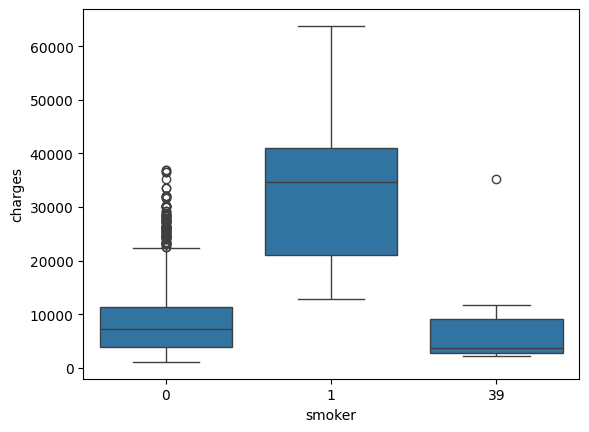

In [24]:
# boxplot for "charges" with respect to "smoker"
sns.boxplot(x="smoker", y="charges", data=df)

In [25]:
# correlation matrix for the dataset
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.017163,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.008877,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,-0.035633,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,-0.002861,-0.025717,0.066442
smoker,-0.017163,0.008877,-0.035633,-0.002861,1.000000,-0.001063,0.143508
region,-0.007167,0.022213,0.271119,-0.025717,-0.001063,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.143508,0.054058,1.000000


Task 4: Model Development

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# linear regression model using "smoker"
linear_model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(
    df[["smoker"]], df["charges"], test_size=0.2, random_state=0
)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
linear_model.fit(x_train, y_train)
r2_score = linear_model.score(x_test, y_test)
print("R^2 score on test data = {:.4f}".format(r2_score))

(2217, 1) (2217,) (555, 1) (555,)
R^2 score on test data = 0.0397


In [37]:
# using all attributes
x_train, x_test, y_train, y_test = train_test_split(
    df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]],
    df["charges"],
    test_size=0.2,
    random_state=0,
)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(2217, 6) (2217,) (555, 6) (555,)


In [38]:
linear_model.fit(x_train, y_train)
r2_score_after = linear_model.score(x_test, y_test)
print("R^2 score on test data = {:.2f}".format(r2_score_after))

R^2 score on test data = 0.19


In [39]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# creating a training pipeline

input = [
    ("scaler", StandardScaler()),
    ("polynomialfeatures", PolynomialFeatures()),
    ("linear_model", LinearRegression()),
]

pipeline = Pipeline(input)

In [41]:
pipeline.fit(x_train, y_train)
r2_score_pipeline = pipeline.score(x_test, y_test)
print("R^2 score on test data = {:.2f}".format(r2_score_pipeline))

R^2 score on test data = 0.67


Task 5: Model Refinement

In [42]:
from sklearn.linear_model import Ridge


alpha = 0.1
ridge_model = Ridge(alpha)

ridge_model.fit(x_train, y_train)

r2_score_ridge = ridge_model.score(x_test, y_test)
print("R^2 score on test data = {:.2f}".format(r2_score_ridge))

R^2 score on test data = 0.19


In [43]:
# apply polynomial with degree = 2

pf_degree = 2
pf = PolynomialFeatures(degree=pf_degree)

x_train_pf = pf.fit_transform(x_train)
x_test_pf = pf.fit_transform(x_test)

ridge_model.fit(x_train_pf, y_train)

r2_score = ridge_model.score(x_test_pf, y_test)
print("R^2 score on test data = {:.2f}".format(r2_score))

R^2 score on test data = 0.67
